In [2]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [3]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [5]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs, targets

(   NumRooms RoofType
 0       NaN      NaN
 1       2.0      NaN
 2       4.0    Slate
 3       NaN      NaN,
 0    127500
 1    106000
 2    178100
 3    140000
 Name: Price, dtype: int64)

In [6]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,RoofType_Slate,RoofType_nan
0,NaN,False,True
1,2.0,False,True
2,4.0,True,False
3,NaN,False,True


In [7]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [8]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### Linear Algebra

In [1]:
import torch

In [2]:
# Scalar is tensor with 1 element, Vector is a tensor with multiple elements in 1 direction
scalar, vector = torch.tensor(2.0), torch.arange(3)
scalar, vector

(tensor(2.), tensor([0, 1, 2]))

In [6]:
# matrices are tensors with multiple elements in multiple direction
matrix = torch.arange(6).reshape(2, 3)
print (matrix)

# transpose is the same as mathematical transpose
print (matrix.T)

# symmetric matrix means A = A.T
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 3],
        [1, 4],
        [2, 5]])


tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [7]:
# In terms of a "real-world" analogy, you can think of it like a bookshelf with 2 shelves, where each shelf has 3 rows of books and each row contains 4 books.
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [8]:
# .clone() creates an identical tensor at a different space
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [9]:
# performing operation with a scalar does element wise operation and the tensor retains its original shape
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [11]:
# sum along one dimensions
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [15]:
# sums over all the elements and returns a single value
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [20]:
# axis = 0, sums over the individual column and returns the result
A.shape, A.sum(axis=0).shape, A.sum(axis = 0)

(torch.Size([2, 3]), torch.Size([3]), tensor([3., 5., 7.]))

In [21]:
# axis = 1 sums over the individual rows and returns the result
A.shape, A.sum(axis=1).shape, A.sum(axis = 1)

(torch.Size([2, 3]), torch.Size([2]), tensor([ 3., 12.]))

In [22]:
# summing over multiple axis gives the overall sum
A.sum(axis=[0, 1]) == A.sum()

tensor(True)

In [23]:
# column mean
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [25]:
# keepdims preserves the original dimensions, basically (2, 3) tensor becomes (2, 1) instead of (1, 2) when you keep keepdims=True
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [27]:
# Can be seen as a row-level normalization
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [28]:
sum_A = A.sum(axis = 0, keepdims = True)
sum_A

tensor([[3., 5., 7.]])

In [30]:
# Column level normalization
A / sum_A

tensor([[0.0000, 0.2000, 0.2857],
        [1.0000, 0.8000, 0.7143]])

In [34]:
# Cumulative sum of row
A.cumsum(axis = 1)

tensor([[ 0.,  1.,  3.],
        [ 3.,  7., 12.]])

In [35]:
# Cumulative sum of column
A.cumsum(axis = 0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [40]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y), torch.sum(x * y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.), tensor(3.))

In [47]:
# @ performs matrix vector or matrix-matrix product provided that they have the necessary shapes A * B, B * C --> A * C
B = torch.ones(3, 4)
A.shape, x.shape, torch.mv(A, x), A@x, A@B

(torch.Size([2, 3]),
 torch.Size([3]),
 tensor([ 5., 14.]),
 tensor([ 5., 14.]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### General Formula of the Vector Norm


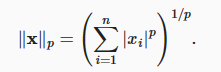

In [48]:
# L2 Norm
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [50]:
# L1 Norm
torch.abs(u).sum()

tensor(7.)

In [52]:
# Frobenius norm of matrix - equivalent to l2 norm of the vector
torch.norm(torch.ones((4, 9)))

tensor(6.)